0
332.45496592527604
1
343.33208060584906
2
134.39081285727679
3
93.975457635067
4
82.79097548459832
5
19.534055863830822
6
16.19189257409051
7
8.806877627238388
8
5.270022767167292
9
1.861587193775136
10
0.9434654461408972
11
0.5873538007450139
12
0.21879518270628123
13
0.1179769358255169
14
0.2237833051276065
15
0.06927323040687326
16
0.013018400336775716
17
0.004827426150794111
18
0.0010137780282177004
19
0.0003012550548864848
[[4.76741439e+03]
 [4.76756340e+03]
 [4.76899465e+03]
 [4.76880050e+03]
 [4.73599636e+03]
 [4.73626835e+03]
 [1.57711313e-06]
 [3.31649522e-01]
 [3.55370690e-01]
 [1.89430746e-06]
 [9.64497358e-06]]


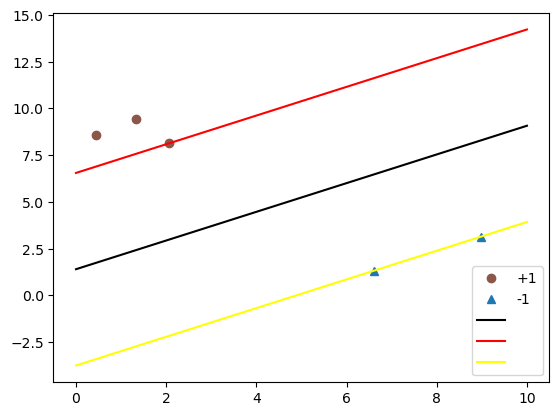

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import random
random.seed(10)
random.random()
x=[]
label=[]
i=0
while i<50 and len(x)<5:    
    x0=10*random.random()
    x1=10*random.random()
    if x0-x1+5<=0:
        label.append(1)
        x.append([x0,x1])
    else:
        if x0-x1-5>=0:
            label.append(-1)
            x.append([x0,x1])
    i=i+1
#print(x)
#print(label)
x_1=[]
x_2=[]
for i in range(len(label)):
    if label[i]==1:
        x_1.append(x[i])
    if label[i]==-1:
        x_2.append(x[i])


#Input A, b, c
A=np.zeros((5,6+5))
A[0,0]=x_1[0][0]
A[0,1]=-x_1[0][0]
A[0,2]=x_1[0][1]
A[0,3]=-x_1[0][1]
A[0,4]=1
A[0,5]=-1
A[0,6]=-1
#print(A)
A[1,0]=x_1[1][0]
A[1,1]=-x_1[1][0]
A[1,2]=x_1[1][1]
A[1,3]=-x_1[1][1]
A[1,4]=1
A[1,5]=-1
A[1,6+1]=-1
#print(A)
i=2
A[i,0]=x_1[i][0]
A[i,1]=-x_1[i][0]
A[i,2]=x_1[i][1]
A[i,3]=-x_1[i][1]
A[i,4]=1
A[i,5]=-1
A[i,6+i]=-1
#print(A)
i=3
j=0
A[i+j,0]=x_2[j][0]
A[i+j,1]=-x_2[j][0]
A[i+j,2]=x_2[j][1]
A[i+j,3]=-x_2[j][1]
A[i+j,4]=1
A[i+j,5]=-1
A[i+j,6+i+j]=1
#print(A)
j=1
A[i+j,0]=x_2[j][0]
A[i+j,1]=-x_2[j][0]
A[i+j,2]=x_2[j][1]
A[i+j,3]=-x_2[j][1]
A[i+j,4]=1
A[i+j,5]=-1
A[i+j,6+i+j]=1
#print(A)

b=np.zeros((5,1))
b[0,0]=1
b[1,0]=1
b[2,0]=1
b[3,0]=-1
b[4,0]=-1
#print(b)
b=np.vstack((np.ones((3,1)),-np.ones((2,1))))
#print(b)






m=len(A)
n=len(A[0,:])


def determineStepSizeUB(d,x,gamma,UB=1):
    alphaUB=float("inf")
    n=len(x)
    for i in range(n):
        if d[i,0]<0:
            if alphaUB>-(gamma *x[i,0])/d[i,0]:
                alphaUB=-(gamma *x[i,0])/d[i,0]
    if alphaUB >UB:
        alphaUB=UB
    return alphaUB

def vector2Matrix(barx,n):
    barX=np.zeros((n,n))
    for i in range(n):
        barX[i,i]=barx[i,0]
    return barX	

def functionValue(alpha,t):
    n=len(alpha)
    i,y,tn=0,0,1
    for coef in alpha:
        y=y+coef*tn
        tn=tn*t
    return y
#m,n=4+3,4*3
#A=A[0:6,:]
#b=b[0:6,:]
#m,n=4+3-1,4*3

barx=np.ones((n,1))
bary=np.ones((m,1))
bars=np.ones((n,1))


c=np.zeros((6+5,1))
barw1=barx[0,0]-barx[1,0]
barw2=barx[2,0]-barx[3,0]
c[0,0]=barw1
c[1,0]=-barw1
c[2,0]=barw2
c[3,0]=-barw2


#bars[0,0]=1
#bars[1,0]=1
#bars[2,0]=1
#bars[3,0]=1


#print(r2)
e=np.ones((n,1))
mu=100
r1=b-A.dot(barx)
r2=c-A.transpose().dot(bary)-bars
barX=vector2Matrix(barx,n)
barS=vector2Matrix(bars,n)
#barX=np.zeros((n,n))
#barX[0,0]=barx[0,0]
#barX[1,1]=barx[1,0]
#barX[2,2]=barx[2,0]
#barX[3,3]=barx[3,0]
#for i in range(n):
#    barX[i,i]=barx[i,0]
#    #print(barX)
#barS=np.zeros((n,n))
#for i in range(n):
#    barS[i,i]=bars[i,0]
r3=mu*e-barX.dot(barS).dot(e)
r=np.vstack((r1,r2,r3))

iteration=0
while iteration<=100 and np.linalg.norm(r)>1e-4:
    print(iteration)
    barA=np.hstack((A,np.zeros((m,m)),np.zeros((m,n))))
    barA=np.vstack((barA,np.hstack((np.zeros((n,n)),A.transpose(),np.identity(n)))))
    barA=np.vstack((barA,np.hstack((barS,np.zeros((n,m)),barX))))
    DeltaX=np.linalg.inv(barA).dot(r)
    #print(DeltaX)
    Deltax=DeltaX[0:n,:]
    #print(Deltax)
    Deltay=DeltaX[n:n+m,:]
    Deltas=DeltaX[n+m:2*n+m,:]
    #print(Deltay)
    #print(Deltas)
    alphax=0.01

    gamma=0.9
    alphax=determineStepSizeUB(Deltax,barx,gamma)
    #print(alphax)
    alphay=0.01
    alphay=determineStepSizeUB(Deltas,bars,gamma)
    #print(alphay)

    newx=barx+alphax*Deltax
    newy=bary+alphay*Deltay
    news=bars+alphay*Deltas#note alphay
    ###############################################
    barx=newx
    bary=newy
    bars=news
    print(np.linalg.norm(r))
    mu=barx.transpose().dot(bars)/(10*n)
    
    iteration=iteration+1
    
    r1=b-A.dot(barx)
    
    #update the cost vector c
    c=np.zeros((6+5,1))
    barw1=barx[0,0]-barx[1,0]
    barw2=barx[2,0]-barx[3,0]
    c[0,0]=barw1
    c[1,0]=-barw1
    c[2,0]=barw2
    c[3,0]=-barw2

    r2=c-A.transpose().dot(bary)-bars
    barX=vector2Matrix(barx,n)
    barS=vector2Matrix(bars,n)
    r3=mu*e-barX.dot(barS).dot(e)
    r=np.vstack((r1,r2,r3))
print(barx)


barw1=barx[0,0]-barx[1,0]
barw2=barx[2,0]-barx[3,0]
barb=barx[4,0]-barx[5,0]
#print(barw1,barw2,barb)


t=np.linspace(0,10,1001)
#print(t)
s1=[]
s2=[]
s3=[]
for x in t :
    s1.append((-barb-barw1*x)/barw2)
    s2.append((1-barb-barw1*x)/barw2)
    s3.append((-1-barb-barw1*x)/barw2)
#print(s1)


fig, ax = plt.subplots()
line1 = ax.plot([x[0] for x in x_1], [x[1] for x in x_1], "o", color="tab:brown", label="+1")
line2 = ax.plot([x[0] for x in x_2], [x[1] for x in x_2], "^", color="tab:blue", label="-1")
line3 = ax.plot(t,s1, color="black", label=" ")
line4 = ax.plot(t,s2, color="red", label=" ")
line5 = ax.plot(t,s3, color="yellow", label=" ")
#line2 = ax.plot([x[0] for x in  dataSet], [functionValue(a,x[0])+1 for x in dataSet], "o", color="tab:blue", label="Points from l1-regression")

ax.legend()
plt.show()


In [12]:
yx=[]
for i in range(len(label)):
    yx.append([label[i]*x[i][0],label[i]*x[i][1]])

print(label)
print(x)
print(yx)
yx0=[]
yx1=[]
for i in range(len(label)):
    yx0.append(label[i]*x[i][0])
    yx1.append(label[i]*x[i][1])
yx0=np.array(yx0).reshape((5,1))
yx1=np.array(yx1).reshape((5,1))
print(yx0,yx1)

IndexError: invalid index to scalar variable.

In [7]:
A=np.hstack((yx0,-yx0,yx1,-yx1))
print(A)
print(type(np.array(label).reshape((5,1))))
print(np.array(label).reshape((5,1)))
A=np.hstack((A,-np.identity(5)))
print(A)

[[-6.14105157  6.14105157 -0.31078579  0.31078579]
 [ 3.17147529 -3.17147529  8.48104931 -8.48104931]
 [-8.52939504  8.52939504 -1.52022365  1.52022365]
 [-7.44666861  7.44666861 -1.93207876  1.93207876]
 [ 0.34744214 -0.34744214  8.31739765 -8.31739765]]
<class 'numpy.ndarray'>
[[ 1]
 [ 1]
 [-1]
 [ 1]
 [-1]]
[[-6.14105157  6.14105157 -0.31078579  0.31078579 -1.         -0.
  -0.         -0.         -0.        ]
 [ 3.17147529 -3.17147529  8.48104931 -8.48104931 -0.         -1.
  -0.         -0.         -0.        ]
 [-8.52939504  8.52939504 -1.52022365  1.52022365 -0.         -0.
  -1.         -0.         -0.        ]
 [-7.44666861  7.44666861 -1.93207876  1.93207876 -0.         -0.
  -0.         -1.         -0.        ]
 [ 0.34744214 -0.34744214  8.31739765 -8.31739765 -0.         -0.
  -0.         -0.         -1.        ]]


0
329.9554925706751
1
317.67935852196223
2
148.22087440813092
3
128.45597731811276
4
106.53441058342351
5
74.9923321081282
6
71.13471694911186
7
52.49901653937799
8
50.13147163208444
9
10.261196733476929
10
9.637630896609195
11
7.78296663315108
12
6.7002157778502855
13
5.548305543020938
14
3.80576923811856
15
2.960255023277
16
1.8503871017738471
17
1.1720752429489913
18
1.682212328140648
19
1.179614395245245
20
1.2905154597808361
21
1.1327162757763227
22
1.1063858493857295
23
0.9216120640535742
24
0.9872153632447744
25
0.8187151558924651
26
0.9169748926789743
27
0.7547501627986879
28
0.8810923117312152
29
0.7255915396481218
30
0.862982775424847
31
0.7108086907682047
32
0.8490368127552187
33
0.6972480722758804
34
0.8408850672522922
35
0.6902286397023871
36
0.8339628429453575
37
0.6832960670605064
38
0.8298148644817072
39
0.6796672422709034
40
0.8259548571321162
41
0.6757205536309082
42
0.8235787692805747
43
0.6735912607859248
44
0.8211545160968303
45
0.6710757386443882
46
0.819618933566

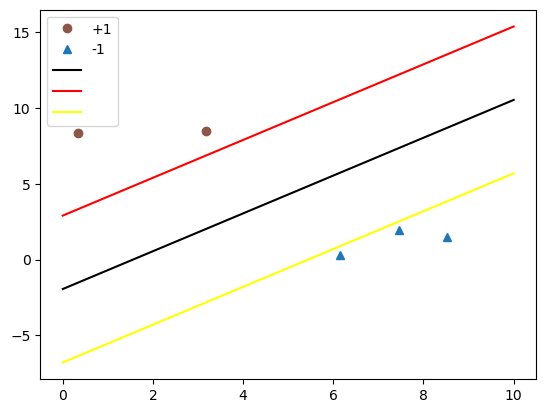

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
random.seed(1227)
nn=5

x=[]
label=[]
i=0
while i<50 and len(x)<nn:    
    x0=10*random.random()
    x1=10*random.random()
    if x0-x1+5<=0:
        label.append(1)
        x.append([x0,x1])
    else:
        if x0-x1-5>=0:
            label.append(-1)
            x.append([x0,x1])
    i=i+1
#print(x)
#print(label)


x_1=[]
x_2=[]
for i in range(len(label)):
    if label[i]==1:
        x_1.append(x[i])
    if label[i]==-1:
        x_2.append(x[i])
        

yx0=[]
yx1=[]
for i in range(len(label)):
    yx0.append(label[i]*x[i][0])
    yx1.append(label[i]*x[i][1])
yx0=np.array(yx0).reshape((nn,1))
yx1=np.array(yx1).reshape((nn,1))

A=np.hstack((yx0,-yx0,yx1,-yx1,np.array(label).reshape((nn,1)),-np.array(label).reshape((nn,1))))
A=np.hstack((A,-np.identity(nn)))


b=np.ones((nn,1))
#print(b)
#print(b)






m=len(A)
n=len(A[0,:])


def determineStepSizeUB(d,x,gamma,UB=1):
    alphaUB=float("inf")
    n=len(x)
    for i in range(n):
        if d[i,0]<0:
            if alphaUB>-(gamma *x[i,0])/d[i,0]:
                alphaUB=-(gamma *x[i,0])/d[i,0]
    if alphaUB >UB:
        alphaUB=UB
    return alphaUB

def vector2Matrix(barx,n):
    barX=np.zeros((n,n))
    for i in range(n):
        barX[i,i]=barx[i,0]
    return barX	

def functionValue(alpha,t):
    n=len(alpha)
    i,y,tn=0,0,1
    for coef in alpha:
        y=y+coef*tn
        tn=tn*t
    return y
#m,n=4+3,4*3
#A=A[0:6,:]
#b=b[0:6,:]
#m,n=4+3-1,4*3

barx=np.ones((n,1))
bary=np.ones((m,1))
bars=np.ones((n,1))


c=np.zeros((6+nn,1))
barw1=barx[0,0]-barx[1,0]
barw2=barx[2,0]-barx[3,0]
c[0,0]=barw1
c[1,0]=-barw1
c[2,0]=barw2
c[3,0]=-barw2


#bars[0,0]=1
#bars[1,0]=1
#bars[2,0]=1
#bars[3,0]=1


#print(r2)
e=np.ones((n,1))
mu=100
r1=b-A.dot(barx)
r2=c-A.transpose().dot(bary)-bars
barX=vector2Matrix(barx,n)
barS=vector2Matrix(bars,n)
#barX=np.zeros((n,n))
#barX[0,0]=barx[0,0]
#barX[1,1]=barx[1,0]
#barX[2,2]=barx[2,0]
#barX[3,3]=barx[3,0]
#for i in range(n):
#    barX[i,i]=barx[i,0]
#    #print(barX)
#barS=np.zeros((n,n))
#for i in range(n):
#    barS[i,i]=bars[i,0]
r3=mu*e-barX.dot(barS).dot(e)
r=np.vstack((r1,r2,r3))

iteration=0
while iteration<=100 and np.linalg.norm(r)>1e-4:
    print(iteration)
    barA=np.hstack((A,np.zeros((m,m)),np.zeros((m,n))))
    barA=np.vstack((barA,np.hstack((np.zeros((n,n)),A.transpose(),np.identity(n)))))
    barA=np.vstack((barA,np.hstack((barS,np.zeros((n,m)),barX))))
    DeltaX=np.linalg.inv(barA).dot(r)
    #print(DeltaX)
    Deltax=DeltaX[0:n,:]
    #print(Deltax)
    Deltay=DeltaX[n:n+m,:]
    Deltas=DeltaX[n+m:2*n+m,:]
    #print(Deltay)
    #print(Deltas)
    alphax=0.01

    gamma=0.9
    alphax=determineStepSizeUB(Deltax,barx,gamma)
    #print(alphax)
    alphay=0.01
    alphay=determineStepSizeUB(Deltas,bars,gamma)
    #print(alphay)

    newx=barx+alphax*Deltax
    newy=bary+alphay*Deltay
    news=bars+alphay*Deltas#note alphay
    ###############################################
    barx=newx
    bary=newy
    bars=news
    print(np.linalg.norm(r))
    mu=barx.transpose().dot(bars)/(10*n)
    
    iteration=iteration+1
    
    r1=b-A.dot(barx)
    
    #update the cost vector c
    c=np.zeros((6+5,1))
    barw1=barx[0,0]-barx[1,0]
    barw2=barx[2,0]-barx[3,0]
    c[0,0]=barw1
    c[1,0]=-barw1
    c[2,0]=barw2
    c[3,0]=-barw2

    r2=c-A.transpose().dot(bary)-bars
    barX=vector2Matrix(barx,n)
    barS=vector2Matrix(bars,n)
    r3=mu*e-barX.dot(barS).dot(e)
    r=np.vstack((r1,r2,r3))
print(barx)


barw1=barx[0,0]-barx[1,0]
barw2=barx[2,0]-barx[3,0]
barb=barx[4,0]-barx[5,0]
#print(barw1,barw2,barb)


t=np.linspace(0,10,1001)
#print(t)
s1=[]
s2=[]
s3=[]
for x in t :
    s1.append((-barb-barw1*x)/barw2)
    s2.append((1-barb-barw1*x)/barw2)
    s3.append((-1-barb-barw1*x)/barw2)
#print(s1)


fig, ax = plt.subplots()
line1 = ax.plot([x[0] for x in x_1], [x[1] for x in x_1], "o", color="tab:brown", label="+1")
line2 = ax.plot([x[0] for x in x_2], [x[1] for x in x_2], "^", color="tab:blue", label="-1")
line3 = ax.plot(t,s1, color="black", label=" ")
line4 = ax.plot(t,s2, color="red", label=" ")
line5 = ax.plot(t,s3, color="yellow", label=" ")
#line2 = ax.plot([x[0] for x in  dataSet], [functionValue(a,x[0])+1 for x in dataSet], "o", color="tab:blue", label="Points from l1-regression")

ax.legend()
plt.show()


0
2266.747053356352
1
2217.461513289443
2
2171.0259521486964
3
482.7647188291198
4
115.5610467100743
5
16.808861175565795
6
2.5063153263608733
7
0.4700659951275846
8
0.1084441290416967
9
0.01974648443504144
10
0.009377046429282531
11
0.002254391618371642
12
0.0007053938201980926
13
0.00013762555422676385
[[1.36132846e+01]
 [1.37564281e+01]
 [1.37939749e+01]
 [1.36125965e+01]
 [1.34635254e+01]
 [1.36658678e+01]
 [1.68008107e-01]
 [5.48032869e-01]
 [3.01941764e-07]
 [3.61914633e-07]
 [1.84800924e-06]
 [8.05855479e-12]
 [8.05855483e-12]
 [8.05876994e-12]
 [8.05873433e-12]
 [8.05859043e-12]]


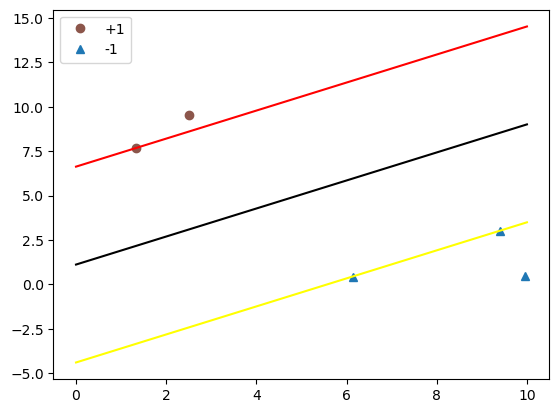

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random
nn=5
random.seed(10)
#random.random()
x=[]
label=[]
i=0
while i<50 and len(x)<nn:    
    x0=10*random.random()
    x1=10*random.random()
    if x0-x1+5<=0:
        label.append(1)
        x.append([x0,x1])
    else:
        if x0-x1-5>=0:
            label.append(-1)
            x.append([x0,x1])
    i=i+1

x_1=[]
x_2=[]
for i in range(len(label)):
    if label[i]==1:
        x_1.append(x[i])
    if label[i]==-1:
        x_2.append(x[i])

yx0=[]
yx1=[]
for i in range(len(label)):
    yx0.append(label[i]*x[i][0])
    yx1.append(label[i]*x[i][1])
yx0=np.array(yx0).reshape((nn,1))
yx1=np.array(yx1).reshape((nn,1))

A=np.hstack((yx0,-yx0,yx1,-yx1,np.array(label).reshape((nn,1)),-np.array(label).reshape((nn,1))))
A=np.hstack((A,-np.identity(nn)))
A=np.hstack((A,np.identity(nn)))

b=np.ones((nn,1))


#Input A, b, c
m=len(A)
n=len(A[0,:])


def determineStepSizeUB(d,x,gamma,UB=1):
    alphaUB=float("inf")
    n=len(x)
    for i in range(n):
        if d[i,0]<0:
            if alphaUB>-(gamma *x[i,0])/d[i,0]:
                alphaUB=-(gamma *x[i,0])/d[i,0]
    if alphaUB >UB:
        alphaUB=UB
    return alphaUB

def vector2Matrix(barx,n):
    barX=np.zeros((n,n))
    for i in range(n):
        barX[i,i]=barx[i,0]
    return barX	

def functionValue(alpha,t):
    n=len(alpha)
    i,y,tn=0,0,1
    for coef in alpha:
        y=y+coef*tn
        tn=tn*t
    return y
#m,n=4+3,4*3
#A=A[0:6,:]
#b=b[0:6,:]
#m,n=4+3-1,4*3

barx=np.ones((n,1))
bary=np.ones((m,1))
bars=np.ones((n,1))


c=np.zeros((6+nn,1))
barw1=barx[0,0]-barx[1,0]
barw2=barx[2,0]-barx[3,0]
c[0,0]=barw1
c[1,0]=-barw1
c[2,0]=barw2
c[3,0]=-barw2
C=1000
c=np.vstack((c,C*np.ones((nn,1))))


#bars[0,0]=1
#bars[1,0]=1
#bars[2,0]=1
#bars[3,0]=1


#print(r2)
e=np.ones((n,1))
mu=100
r1=b-A.dot(barx)
r2=c-A.transpose().dot(bary)-bars
barX=vector2Matrix(barx,n)
barS=vector2Matrix(bars,n)
#barX=np.zeros((n,n))
#barX[0,0]=barx[0,0]
#barX[1,1]=barx[1,0]
#barX[2,2]=barx[2,0]
#barX[3,3]=barx[3,0]
#for i in range(n):
#    barX[i,i]=barx[i,0]
#    #print(barX)
#barS=np.zeros((n,n))
#for i in range(n):
#    barS[i,i]=bars[i,0]
r3=mu*e-barX.dot(barS).dot(e)
r=np.vstack((r1,r2,r3))

iteration=0
while iteration<=100 and np.linalg.norm(r)>1e-4:
    print(iteration)
    barA=np.hstack((A,np.zeros((m,m)),np.zeros((m,n))))
    barA=np.vstack((barA,np.hstack((np.zeros((n,n)),A.transpose(),np.identity(n)))))
    barA=np.vstack((barA,np.hstack((barS,np.zeros((n,m)),barX))))
    DeltaX=np.linalg.inv(barA).dot(r)
    #print(DeltaX)
    Deltax=DeltaX[0:n,:]
    #print(Deltax)
    Deltay=DeltaX[n:n+m,:]
    Deltas=DeltaX[n+m:2*n+m,:]
    #print(Deltay)
    #print(Deltas)
    alphax=0.01

    gamma=0.9
    alphax=determineStepSizeUB(Deltax,barx,gamma)
    #print(alphax)
    alphay=0.01
    alphay=determineStepSizeUB(Deltas,bars,gamma)
    #print(alphay)

    newx=barx+alphax*Deltax
    newy=bary+alphay*Deltay
    news=bars+alphay*Deltas#note alphay
    ###############################################
    barx=newx
    bary=newy
    bars=news
    print(np.linalg.norm(r))
    mu=barx.transpose().dot(bars)/(10*n)
    
    iteration=iteration+1
    
    r1=b-A.dot(barx)
    
    #Update the cost vector c
    c=np.zeros((6+nn,1))
    barw1=barx[0,0]-barx[1,0]
    barw2=barx[2,0]-barx[3,0]
    c[0,0]=barw1
    c[1,0]=-barw1
    c[2,0]=barw2
    c[3,0]=-barw2
    c=np.vstack((c,C*np.ones((nn,1))))
    
    r2=c-A.transpose().dot(bary)-bars
    barX=vector2Matrix(barx,n)
    barS=vector2Matrix(bars,n)
    r3=mu*e-barX.dot(barS).dot(e)
    r=np.vstack((r1,r2,r3))
print(barx)
#add the code for showing the result
barw1=barx[0,0]-barx[1,0]
barw2=barx[2,0]-barx[3,0]
barb=barx[4,0]-barx[5,0]
t=np.linspace(0,10,1001)
s1=[]
s2=[]
s3=[]
for x in t:
    s1.append((-barb-barw1*x)/barw2)
    s2.append((1-barb-barw1*x)/barw2)
    s3.append((-1-barb-barw1*x)/barw2)
fig, ax = plt.subplots()
line1 = ax.plot([x[0] for x in x_1], [x[1] for x in x_1], "o", color="tab:brown", label="+1")
line2 = ax.plot([x[0] for x in x_2], [x[1] for x in x_2], "^", color="tab:blue", label="-1")
line3 = ax.plot(t, s1, color="black", label="")
line4 = ax.plot(t, s2, color="red", label="")
line5 = ax.plot(t, s3, color="yellow", label="")

#line2 = ax.plot([x[0] for x in  dataSet], [functionValue(a,x[0])+1 for x in dataSet], "o", color="tab:blue", label="Points from l1-regression")

ax.legend()
plt.show()